This Notebook Depicts Audio Classification Of Emergency Vehicle Sirens Based On The Dataset Created Which We Refer To As SireNNet.

# About Dataset
The dataset consists of wav-format audio files which are of length 3-seconds. They contain the siren sound of Emergency Vehicles - Police, Ambulance and Firetruck. A fourth category named Traffic also exists where it contains 3-second .wav format audio files of plain traffic sound. Each category contains 200 sound files.

# Importing Libraries

In [ ]:
#Audio Processing Libraries
import librosa
import librosa.display
from scipy import signal

#For Playing Audios
import IPython.display as ipd

#Array Processing
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Display the confusion matrix
from sklearn.metrics import confusion_matrix

#Deal with .pkl files
import pickle

#Create a dataframe
import pandas as pd

#Transform and encode the categorical targets
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#Split dataset
from sklearn.model_selection import train_test_split

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploring Dataset

In [ ]:
# Ambulance

filename = "/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/ambulance/sound_1.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

NameError: ignored

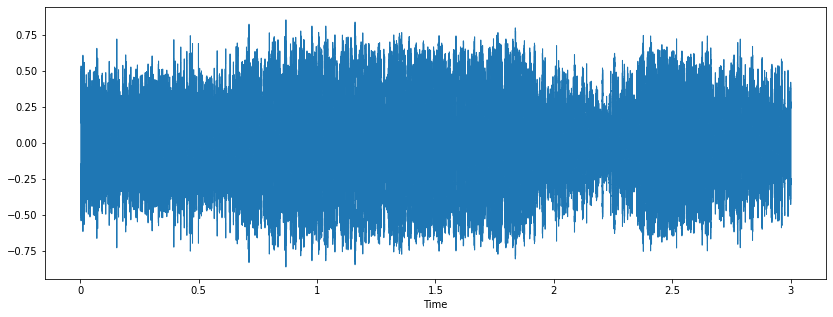

In [ ]:
# Firetruck

filename = "/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/firetruck/sound_201.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

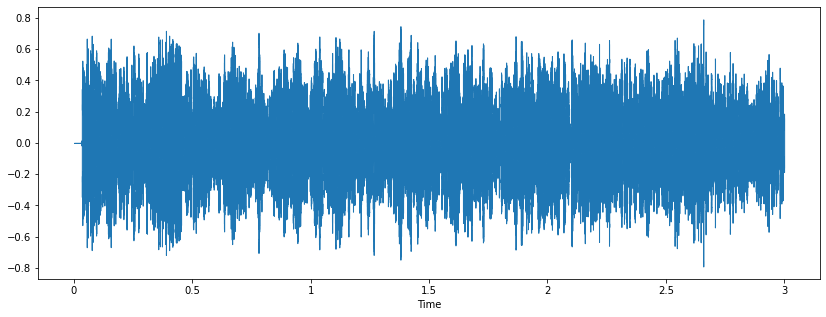

In [ ]:
# Police

filename = "/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/police/sound_601.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

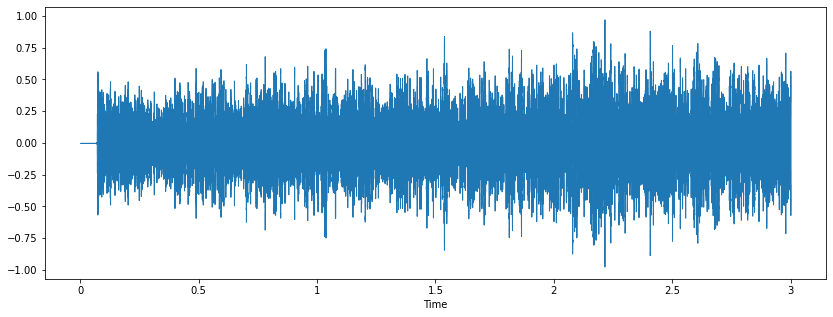

In [ ]:
# Traffic

filename = "/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/traffic/sound_401.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

# Data Preprocessing

In [ ]:
# Using the function features_extractor to get a 80 MFCCs from each audio
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [ ]:
# Now we iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients
audio_dataset_path = '/content/drive/MyDrive/Audio_classification/sireNNet/emergency_vehicle_sounds/'

extracted_features = []
for path in os.listdir(audio_dataset_path):
    for file in os.listdir(audio_dataset_path+path+"/"):
        if file.lower().endswith(".wav"):
            file_name = audio_dataset_path+path+"/"+file
            data = features_extractor(file_name)
            extracted_features.append([data, path])

In [ ]:
# Save the data frame into a .pkl file
f = open('/content/drive/MyDrive/Audio_classification/sireNNet/Extracted_FeaturesAugmented.pkl', 'wb')
pickle.dump(extracted_features, f)
f.close()

In [ ]:
#  Read the Extracted_Features from the .pkl file
f = open('/content/drive/MyDrive/Audio_classification/sireNNet/Extracted_FeaturesAugmented.pkl', 'rb')
Data = pickle.load(f)
f.close()

In [ ]:
# Transform Data into a dataframe
df = pd.DataFrame(Data,columns=['feature','class'])
df.head()

,feature,class
0,"[-302.7111, 95.41589, -53.674664, -10.595546, ...",ambulance
1,"[-312.88766, 96.170265, -46.613415, -13.018149...",ambulance
2,"[1.4056735, 104.4055, -40.99026, 1.8715706, -2...",ambulance
3,"[-170.2212, 117.14442, -37.209496, -5.6599894,...",ambulance
4,"[-129.6423, 126.78272, -35.10049, -14.79055, -...",ambulance


In [ ]:
df['class'].value_counts()

police       454
traffic      421
ambulance    400
firetruck    400
Name: class, dtype: int64

In [ ]:
# Splitting the data into train and test sets
X = np.array(df['feature'].tolist())
Y = np.array(df['class'].tolist())

In [ ]:
X. shape

(1675, 80)

In [ ]:
Y.shape

(1675,)

In [ ]:
# Label Encoding
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(Y))

In [ ]:
Y[0]

'ambulance'

In [ ]:
y[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

In [ ]:
y_train.shape

(1340, 4)

In [ ]:
# Display the shape of each splits
X_train.shape

(1340, 80)

In [ ]:
X_test.shape

(335, 80)

In [ ]:
y_test.shape

(335, 4)

# Model Building

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K
from sklearn import metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [ ]:
# TO DO

'''
Try GridSearch on CNN Network to find best parameters and then train
'''

'\nTry GridSearch on CNN Network to find best parameters and then train\n'

In [ ]:
X_train_features  = X_train.reshape(len(X_train),-1,1)
X_test_features = X_test.reshape(len(X_test),-1,1)
print("Reshaped Array Size", X_train_features.shape)

Reshaped Array Size (1340, 80, 1)


In [ ]:
X_train.shape

(1340, 80)

In [ ]:
def cnn(optimizer="adam", activation="relu", dropout_rate=0.3):
    K.clear_session()
    inputs = Input(shape=(X_train_features.shape[1], X_train_features.shape[2]))

    #First Conv1D layer
    conv = Conv1D(3, 13, padding='same', activation=activation)(inputs)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)

    #Second Conv1D layer
    conv = Conv1D(16, 11, padding='same', activation=activation)(conv)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)

    #MaxPooling 1D
    conv = GlobalMaxPool1D()(conv)

    #Dense Layer
    conv = Dense(16, activation=activation)(conv)
    outputs = Dense(y_test.shape[1], activation='softmax')(conv)

    model = Model(inputs, outputs)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['acc'])
    return model

In [ ]:
model_cnn = cnn(optimizer="adam", activation="relu", dropout_rate=0)
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 80, 3)             42        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 40, 3)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 16)            544       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 16)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0     

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode ='max',
                          patience = 10, restore_best_weights = True)

history = model_cnn.fit(X_train_features, y_train, epochs = 400,
                       callbacks = [early_stop],
                       batch_size = 64, validation_data = (X_test_features, y_test))

Epoch 1/400
20/21 [===========================>..] - ETA: 0s - loss: 4.3131 - acc: 0.2688

21/21 [==============================] - 2s 23ms/step - loss: 4.1817 - acc: 0.2709 - val_loss: 1.6624 - val_acc: 0.2716
Epoch 2/400
17/21 [=======================>......] - ETA: 0s - loss: 1.0771 - acc: 0.2996

21/21 [==============================] - 0s 9ms/step - loss: 0.9988 - acc: 0.3328 - val_loss: 0.6788 - val_acc: 0.4358
Epoch 3/400
15/21 [====================>.........] - ETA: 0s - loss: 0.5882 - acc: 0.4917

21/21 [==============================] - 0s 12ms/step - loss: 0.5736 - acc: 0.4933 - val_loss: 0.5241 - val_acc: 0.5134
Epoch 4/400
15/21 [====================>.........] - ETA: 0s - loss: 0.4885 - acc: 0.5344

21/21 [==============================] - 0s 10ms/step - loss: 0.4711 - acc: 0.5522 - val_loss: 0.4403 - val_acc: 0.6119
Epoch 5/400
15/21 [====================>.........] - ETA: 0s - loss: 0.4272 - acc: 0.6417

21/21 [==============================] - 0s 10ms/step - loss: 0.4190 - acc: 0.6575 - val_loss: 0.4067 - val_acc: 0.7075
Epoch 6/400
17/21 [=======================>......] - ETA: 0s - loss: 0.3824 - acc: 0.7077

21/21 [==============================] - 0s 9ms/step - loss: 0.3864 - acc: 0.7052 - val_loss: 0.3680 - val_acc: 0.7552
Epoch 7/400
20/21 [===========================>..] - ETA: 0s - loss: 0.3535 - acc: 0.7617

21/21 [==============================] - 0s 13ms/step - loss: 0.3553 - acc: 0.7619 - val_loss: 0.3401 - val_acc: 0.7642
Epoch 8/400
14/21 [===================>..........] - ETA: 0s - loss: 0.3358 - acc: 0.7779

21/21 [==============================] - 0s 10ms/step - loss: 0.3290 - acc: 0.7836 - val_loss: 0.3203 - val_acc: 0.7761
Epoch 9/400
15/21 [====================>.........] - ETA: 0s - loss: 0.3176 - acc: 0.7802

21/21 [==============================] - 0s 10ms/step - loss: 0.3113 - acc: 0.7910 - val_loss: 0.2940 - val_acc: 0.8209
Epoch 10/400
16/21 [=====================>........] - ETA: 0s - loss: 0.2889 - acc: 0.8115

21/21 [==============================] - 0s 9ms/step - loss: 0.2910 - acc: 0.8127 - val_loss: 0.2767 - val_acc: 0.8388
Epoch 11/400
21/21 [==============================] - ETA: 0s - loss: 0.2764 - acc: 0.8276

21/21 [==============================] - 0s 11ms/step - loss: 0.2764 - acc: 0.8276 - val_loss: 0.2627 - val_acc: 0.8358
Epoch 12/400
21/21 [==============================] - ETA: 0s - loss: 0.2638 - acc: 0.8313

21/21 [==============================] - 0s 11ms/step - loss: 0.2638 - acc: 0.8313 - val_loss: 0.2524 - val_acc: 0.8328
Epoch 13/400
15/21 [====================>.........] - ETA: 0s - loss: 0.2559 - acc: 0.8438

21/21 [==============================] - 0s 10ms/step - loss: 0.2535 - acc: 0.8433 - val_loss: 0.2411 - val_acc: 0.8537
Epoch 14/400
14/21 [===================>..........] - ETA: 0s - loss: 0.2404 - acc: 0.8449

21/21 [==============================] - 0s 10ms/step - loss: 0.2429 - acc: 0.8448 - val_loss: 0.2328 - val_acc: 0.8567
Epoch 15/400
16/21 [=====================>........] - ETA: 0s - loss: 0.2373 - acc: 0.8418

21/21 [==============================] - 0s 9ms/step - loss: 0.2344 - acc: 0.8455 - val_loss: 0.2265 - val_acc: 0.8567
Epoch 16/400
17/21 [=======================>......] - ETA: 0s - loss: 0.2242 - acc: 0.8585

21/21 [==============================] - 0s 10ms/step - loss: 0.2270 - acc: 0.8590 - val_loss: 0.2192 - val_acc: 0.8567
Epoch 17/400
21/21 [==============================] - ETA: 0s - loss: 0.2209 - acc: 0.8522

21/21 [==============================] - 0s 11ms/step - loss: 0.2209 - acc: 0.8522 - val_loss: 0.2132 - val_acc: 0.8537
Epoch 18/400
17/21 [=======================>......] - ETA: 0s - loss: 0.2126 - acc: 0.8649

21/21 [==============================] - 0s 11ms/step - loss: 0.2126 - acc: 0.8627 - val_loss: 0.2076 - val_acc: 0.8567
Epoch 19/400
20/21 [===========================>..] - ETA: 0s - loss: 0.2035 - acc: 0.8742

21/21 [==============================] - 0s 11ms/step - loss: 0.2065 - acc: 0.8709 - val_loss: 0.2023 - val_acc: 0.8627
Epoch 20/400
16/21 [=====================>........] - ETA: 0s - loss: 0.2042 - acc: 0.8652

21/21 [==============================] - 0s 10ms/step - loss: 0.2009 - acc: 0.8672 - val_loss: 0.1963 - val_acc: 0.8776
Epoch 21/400
21/21 [==============================] - ETA: 0s - loss: 0.1953 - acc: 0.8739

21/21 [==============================] - 0s 11ms/step - loss: 0.1953 - acc: 0.8739 - val_loss: 0.1935 - val_acc: 0.8836
Epoch 22/400
15/21 [====================>.........] - ETA: 0s - loss: 0.1930 - acc: 0.8771

21/21 [==============================] - 0s 10ms/step - loss: 0.1907 - acc: 0.8769 - val_loss: 0.1890 - val_acc: 0.8836
Epoch 23/400
16/21 [=====================>........] - ETA: 0s - loss: 0.1889 - acc: 0.8789

21/21 [==============================] - 0s 10ms/step - loss: 0.1865 - acc: 0.8813 - val_loss: 0.1833 - val_acc: 0.8925
Epoch 24/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1891 - acc: 0.8805

21/21 [==============================] - 0s 10ms/step - loss: 0.1815 - acc: 0.8843 - val_loss: 0.1806 - val_acc: 0.8836
Epoch 25/400
15/21 [====================>.........] - ETA: 0s - loss: 0.1818 - acc: 0.8802

21/21 [==============================] - 0s 9ms/step - loss: 0.1784 - acc: 0.8836 - val_loss: 0.1811 - val_acc: 0.8627
Epoch 26/400
20/21 [===========================>..] - ETA: 0s - loss: 0.1738 - acc: 0.8797

21/21 [==============================] - 0s 12ms/step - loss: 0.1756 - acc: 0.8784 - val_loss: 0.1785 - val_acc: 0.8896
Epoch 27/400
20/21 [===========================>..] - ETA: 0s - loss: 0.1713 - acc: 0.8875

21/21 [==============================] - 0s 18ms/step - loss: 0.1715 - acc: 0.8896 - val_loss: 0.1721 - val_acc: 0.8836
Epoch 28/400
20/21 [===========================>..] - ETA: 0s - loss: 0.1659 - acc: 0.8875

21/21 [==============================] - 0s 17ms/step - loss: 0.1693 - acc: 0.8858 - val_loss: 0.1695 - val_acc: 0.8985
Epoch 29/400
21/21 [==============================] - ETA: 0s - loss: 0.1651 - acc: 0.8851

21/21 [==============================] - 0s 15ms/step - loss: 0.1651 - acc: 0.8851 - val_loss: 0.1689 - val_acc: 0.8866
Epoch 30/400
21/21 [==============================] - ETA: 0s - loss: 0.1598 - acc: 0.8948

21/21 [==============================] - 0s 16ms/step - loss: 0.1598 - acc: 0.8948 - val_loss: 0.1639 - val_acc: 0.9015
Epoch 31/400
21/21 [==============================] - ETA: 0s - loss: 0.1566 - acc: 0.8970

21/21 [==============================] - 0s 14ms/step - loss: 0.1566 - acc: 0.8970 - val_loss: 0.1621 - val_acc: 0.8925
Epoch 32/400
20/21 [===========================>..] - ETA: 0s - loss: 0.1510 - acc: 0.9000

21/21 [==============================] - 0s 15ms/step - loss: 0.1547 - acc: 0.8963 - val_loss: 0.1599 - val_acc: 0.9015
Epoch 33/400
21/21 [==============================] - ETA: 0s - loss: 0.1522 - acc: 0.9015

21/21 [==============================] - 0s 16ms/step - loss: 0.1522 - acc: 0.9015 - val_loss: 0.1582 - val_acc: 0.9015
Epoch 34/400
21/21 [==============================] - ETA: 0s - loss: 0.1507 - acc: 0.9007

21/21 [==============================] - 0s 15ms/step - loss: 0.1507 - acc: 0.9007 - val_loss: 0.1556 - val_acc: 0.9045
Epoch 35/400
20/21 [===========================>..] - ETA: 0s - loss: 0.1480 - acc: 0.9039

21/21 [==============================] - 0s 16ms/step - loss: 0.1488 - acc: 0.9030 - val_loss: 0.1571 - val_acc: 0.9045
Epoch 36/400
20/21 [===========================>..] - ETA: 0s - loss: 0.1461 - acc: 0.9031

21/21 [==============================] - 0s 17ms/step - loss: 0.1481 - acc: 0.9045 - val_loss: 0.1552 - val_acc: 0.9134
Epoch 37/400
21/21 [==============================] - ETA: 0s - loss: 0.1442 - acc: 0.9030

21/21 [==============================] - 0s 15ms/step - loss: 0.1442 - acc: 0.9030 - val_loss: 0.1518 - val_acc: 0.9075
Epoch 38/400
20/21 [===========================>..] - ETA: 0s - loss: 0.1401 - acc: 0.9078

21/21 [==============================] - 0s 17ms/step - loss: 0.1406 - acc: 0.9067 - val_loss: 0.1502 - val_acc: 0.9045
Epoch 39/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1403 - acc: 0.9026

21/21 [==============================] - 0s 16ms/step - loss: 0.1404 - acc: 0.9067 - val_loss: 0.1505 - val_acc: 0.9075
Epoch 40/400
16/21 [=====================>........] - ETA: 0s - loss: 0.1343 - acc: 0.9170

21/21 [==============================] - 0s 9ms/step - loss: 0.1393 - acc: 0.9104 - val_loss: 0.1533 - val_acc: 0.9045
Epoch 41/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1399 - acc: 0.9090

21/21 [==============================] - 0s 9ms/step - loss: 0.1368 - acc: 0.9112 - val_loss: 0.1517 - val_acc: 0.9045
Epoch 42/400
15/21 [====================>.........] - ETA: 0s - loss: 0.1375 - acc: 0.9104

21/21 [==============================] - 0s 10ms/step - loss: 0.1362 - acc: 0.9112 - val_loss: 0.1463 - val_acc: 0.9164
Epoch 43/400
16/21 [=====================>........] - ETA: 0s - loss: 0.1364 - acc: 0.9082

21/21 [==============================] - 0s 9ms/step - loss: 0.1347 - acc: 0.9112 - val_loss: 0.1453 - val_acc: 0.9194
Epoch 44/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1277 - acc: 0.9200

21/21 [==============================] - 0s 9ms/step - loss: 0.1309 - acc: 0.9142 - val_loss: 0.1467 - val_acc: 0.9045
Epoch 45/400
15/21 [====================>.........] - ETA: 0s - loss: 0.1289 - acc: 0.9187

21/21 [==============================] - 0s 10ms/step - loss: 0.1297 - acc: 0.9172 - val_loss: 0.1461 - val_acc: 0.9104
Epoch 46/400
16/21 [=====================>........] - ETA: 0s - loss: 0.1321 - acc: 0.9141

21/21 [==============================] - 0s 10ms/step - loss: 0.1291 - acc: 0.9179 - val_loss: 0.1445 - val_acc: 0.9075
Epoch 47/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1289 - acc: 0.9145

21/21 [==============================] - 0s 9ms/step - loss: 0.1265 - acc: 0.9194 - val_loss: 0.1407 - val_acc: 0.9164
Epoch 48/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1236 - acc: 0.9191

21/21 [==============================] - 0s 9ms/step - loss: 0.1249 - acc: 0.9187 - val_loss: 0.1423 - val_acc: 0.9104
Epoch 49/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1247 - acc: 0.9191

21/21 [==============================] - 0s 9ms/step - loss: 0.1238 - acc: 0.9216 - val_loss: 0.1377 - val_acc: 0.9224
Epoch 50/400
16/21 [=====================>........] - ETA: 0s - loss: 0.1173 - acc: 0.9238

21/21 [==============================] - 0s 10ms/step - loss: 0.1234 - acc: 0.9187 - val_loss: 0.1422 - val_acc: 0.9224
Epoch 51/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1205 - acc: 0.9219

21/21 [==============================] - 0s 9ms/step - loss: 0.1224 - acc: 0.9201 - val_loss: 0.1383 - val_acc: 0.9134
Epoch 52/400
15/21 [====================>.........] - ETA: 0s - loss: 0.1201 - acc: 0.9260

21/21 [==============================] - 0s 10ms/step - loss: 0.1207 - acc: 0.9246 - val_loss: 0.1453 - val_acc: 0.9045
Epoch 53/400
16/21 [=====================>........] - ETA: 0s - loss: 0.1234 - acc: 0.9219

21/21 [==============================] - 0s 9ms/step - loss: 0.1204 - acc: 0.9246 - val_loss: 0.1370 - val_acc: 0.9164
Epoch 54/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1138 - acc: 0.9283

21/21 [==============================] - 0s 11ms/step - loss: 0.1176 - acc: 0.9239 - val_loss: 0.1339 - val_acc: 0.9194
Epoch 55/400
14/21 [===================>..........] - ETA: 0s - loss: 0.1164 - acc: 0.9185

21/21 [==============================] - 0s 10ms/step - loss: 0.1159 - acc: 0.9216 - val_loss: 0.1374 - val_acc: 0.9104
Epoch 56/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1112 - acc: 0.9228

21/21 [==============================] - 0s 9ms/step - loss: 0.1157 - acc: 0.9209 - val_loss: 0.1385 - val_acc: 0.9104
Epoch 57/400
18/21 [========================>.....] - ETA: 0s - loss: 0.1124 - acc: 0.9314

21/21 [==============================] - 0s 9ms/step - loss: 0.1136 - acc: 0.9269 - val_loss: 0.1302 - val_acc: 0.9104
Epoch 58/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1114 - acc: 0.9292

21/21 [==============================] - 0s 9ms/step - loss: 0.1127 - acc: 0.9269 - val_loss: 0.1361 - val_acc: 0.9045
Epoch 59/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1139 - acc: 0.9246

21/21 [==============================] - 0s 9ms/step - loss: 0.1137 - acc: 0.9246 - val_loss: 0.1386 - val_acc: 0.8985
Epoch 60/400
15/21 [====================>.........] - ETA: 0s - loss: 0.1181 - acc: 0.9219

21/21 [==============================] - 0s 10ms/step - loss: 0.1105 - acc: 0.9299 - val_loss: 0.1309 - val_acc: 0.9104
Epoch 61/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1114 - acc: 0.9292

21/21 [==============================] - 0s 9ms/step - loss: 0.1073 - acc: 0.9328 - val_loss: 0.1291 - val_acc: 0.9164
Epoch 62/400
18/21 [========================>.....] - ETA: 0s - loss: 0.1096 - acc: 0.9271

21/21 [==============================] - 0s 9ms/step - loss: 0.1099 - acc: 0.9276 - val_loss: 0.1303 - val_acc: 0.9313
Epoch 63/400
16/21 [=====================>........] - ETA: 0s - loss: 0.1108 - acc: 0.9307

21/21 [==============================] - 0s 9ms/step - loss: 0.1060 - acc: 0.9313 - val_loss: 0.1258 - val_acc: 0.9254
Epoch 64/400
17/21 [=======================>......] - ETA: 0s - loss: 0.1039 - acc: 0.9338

21/21 [==============================] - 0s 10ms/step - loss: 0.1028 - acc: 0.9336 - val_loss: 0.1261 - val_acc: 0.9194
Epoch 65/400
16/21 [=====================>........] - ETA: 0s - loss: 0.1044 - acc: 0.9316

21/21 [==============================] - 0s 10ms/step - loss: 0.1027 - acc: 0.9343 - val_loss: 0.1258 - val_acc: 0.9194
Epoch 66/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0989 - acc: 0.9375

21/21 [==============================] - 0s 10ms/step - loss: 0.0999 - acc: 0.9343 - val_loss: 0.1277 - val_acc: 0.9164
Epoch 67/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0917 - acc: 0.9434

21/21 [==============================] - 0s 9ms/step - loss: 0.1005 - acc: 0.9343 - val_loss: 0.1237 - val_acc: 0.9164
Epoch 68/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0988 - acc: 0.9393

21/21 [==============================] - 0s 9ms/step - loss: 0.0983 - acc: 0.9366 - val_loss: 0.1227 - val_acc: 0.9194
Epoch 69/400
16/21 [=====================>........] - ETA: 0s - loss: 0.1000 - acc: 0.9365

21/21 [==============================] - 0s 9ms/step - loss: 0.0992 - acc: 0.9373 - val_loss: 0.1253 - val_acc: 0.9194
Epoch 70/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0991 - acc: 0.9414

21/21 [==============================] - 0s 10ms/step - loss: 0.1010 - acc: 0.9381 - val_loss: 0.1320 - val_acc: 0.9134
Epoch 71/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0958 - acc: 0.9414

21/21 [==============================] - 0s 10ms/step - loss: 0.1030 - acc: 0.9381 - val_loss: 0.1273 - val_acc: 0.9104
Epoch 72/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0979 - acc: 0.9338

21/21 [==============================] - 0s 9ms/step - loss: 0.0967 - acc: 0.9366 - val_loss: 0.1240 - val_acc: 0.9194
Epoch 73/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0971 - acc: 0.9357

21/21 [==============================] - 0s 9ms/step - loss: 0.0944 - acc: 0.9388 - val_loss: 0.1261 - val_acc: 0.9164
Epoch 74/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0868 - acc: 0.9476

21/21 [==============================] - 0s 10ms/step - loss: 0.0934 - acc: 0.9433 - val_loss: 0.1222 - val_acc: 0.9164
Epoch 75/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0957 - acc: 0.9375

21/21 [==============================] - 0s 10ms/step - loss: 0.0936 - acc: 0.9396 - val_loss: 0.1216 - val_acc: 0.9224
Epoch 76/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0932 - acc: 0.9395

21/21 [==============================] - 0s 9ms/step - loss: 0.0922 - acc: 0.9388 - val_loss: 0.1211 - val_acc: 0.9224
Epoch 77/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0879 - acc: 0.9458

21/21 [==============================] - 0s 9ms/step - loss: 0.0906 - acc: 0.9433 - val_loss: 0.1240 - val_acc: 0.9194
Epoch 78/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0882 - acc: 0.9473

21/21 [==============================] - 0s 9ms/step - loss: 0.0927 - acc: 0.9418 - val_loss: 0.1244 - val_acc: 0.9194
Epoch 79/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0868 - acc: 0.9421

21/21 [==============================] - 0s 9ms/step - loss: 0.0929 - acc: 0.9366 - val_loss: 0.1266 - val_acc: 0.9075
Epoch 80/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0848 - acc: 0.9463

21/21 [==============================] - 0s 10ms/step - loss: 0.0883 - acc: 0.9448 - val_loss: 0.1190 - val_acc: 0.9254
Epoch 81/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0852 - acc: 0.9494

21/21 [==============================] - 0s 9ms/step - loss: 0.0890 - acc: 0.9463 - val_loss: 0.1229 - val_acc: 0.9164
Epoch 82/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0860 - acc: 0.9458

21/21 [==============================] - 0s 9ms/step - loss: 0.0860 - acc: 0.9448 - val_loss: 0.1199 - val_acc: 0.9224
Epoch 83/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0831 - acc: 0.9443

21/21 [==============================] - 0s 10ms/step - loss: 0.0859 - acc: 0.9448 - val_loss: 0.1261 - val_acc: 0.9224
Epoch 84/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0967 - acc: 0.9329

21/21 [==============================] - 0s 11ms/step - loss: 0.0942 - acc: 0.9366 - val_loss: 0.1248 - val_acc: 0.9224
Epoch 85/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0869 - acc: 0.9427

21/21 [==============================] - 0s 10ms/step - loss: 0.0878 - acc: 0.9418 - val_loss: 0.1164 - val_acc: 0.9254
Epoch 86/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0806 - acc: 0.9476

21/21 [==============================] - 0s 9ms/step - loss: 0.0842 - acc: 0.9463 - val_loss: 0.1169 - val_acc: 0.9254
Epoch 87/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0829 - acc: 0.9504

21/21 [==============================] - 0s 9ms/step - loss: 0.0822 - acc: 0.9485 - val_loss: 0.1174 - val_acc: 0.9284
Epoch 88/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0831 - acc: 0.9504

21/21 [==============================] - 0s 17ms/step - loss: 0.0838 - acc: 0.9515 - val_loss: 0.1171 - val_acc: 0.9254
Epoch 89/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0815 - acc: 0.9539

21/21 [==============================] - 0s 19ms/step - loss: 0.0806 - acc: 0.9545 - val_loss: 0.1173 - val_acc: 0.9254
Epoch 90/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0814 - acc: 0.9539

21/21 [==============================] - 1s 40ms/step - loss: 0.0812 - acc: 0.9545 - val_loss: 0.1282 - val_acc: 0.9164
Epoch 91/400
21/21 [==============================] - ETA: 0s - loss: 0.0835 - acc: 0.9493

21/21 [==============================] - 0s 16ms/step - loss: 0.0835 - acc: 0.9493 - val_loss: 0.1187 - val_acc: 0.9164
Epoch 92/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0836 - acc: 0.9490

21/21 [==============================] - 0s 17ms/step - loss: 0.0802 - acc: 0.9515 - val_loss: 0.1220 - val_acc: 0.9373
Epoch 93/400
21/21 [==============================] - ETA: 0s - loss: 0.0803 - acc: 0.9485

21/21 [==============================] - 0s 16ms/step - loss: 0.0803 - acc: 0.9485 - val_loss: 0.1156 - val_acc: 0.9343
Epoch 94/400
21/21 [==============================] - ETA: 0s - loss: 0.0763 - acc: 0.9567

21/21 [==============================] - 0s 17ms/step - loss: 0.0763 - acc: 0.9567 - val_loss: 0.1157 - val_acc: 0.9224
Epoch 95/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0751 - acc: 0.9600

21/21 [==============================] - 0s 16ms/step - loss: 0.0757 - acc: 0.9567 - val_loss: 0.1138 - val_acc: 0.9313
Epoch 96/400
21/21 [==============================] - ETA: 0s - loss: 0.0768 - acc: 0.9560

21/21 [==============================] - 0s 16ms/step - loss: 0.0768 - acc: 0.9560 - val_loss: 0.1114 - val_acc: 0.9254
Epoch 97/400
21/21 [==============================] - ETA: 0s - loss: 0.0745 - acc: 0.9604

21/21 [==============================] - 0s 16ms/step - loss: 0.0745 - acc: 0.9604 - val_loss: 0.1105 - val_acc: 0.9284
Epoch 98/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0739 - acc: 0.9629

21/21 [==============================] - 0s 15ms/step - loss: 0.0743 - acc: 0.9604 - val_loss: 0.1124 - val_acc: 0.9343
Epoch 99/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0766 - acc: 0.9512

21/21 [==============================] - 0s 13ms/step - loss: 0.0757 - acc: 0.9545 - val_loss: 0.1117 - val_acc: 0.9254
Epoch 100/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0718 - acc: 0.9563

21/21 [==============================] - 0s 10ms/step - loss: 0.0754 - acc: 0.9560 - val_loss: 0.1134 - val_acc: 0.9313
Epoch 101/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0770 - acc: 0.9590

21/21 [==============================] - 0s 10ms/step - loss: 0.0737 - acc: 0.9575 - val_loss: 0.1106 - val_acc: 0.9224
Epoch 102/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0760 - acc: 0.9497

21/21 [==============================] - 0s 9ms/step - loss: 0.0728 - acc: 0.9515 - val_loss: 0.1183 - val_acc: 0.9254
Epoch 103/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0692 - acc: 0.9559

21/21 [==============================] - 0s 9ms/step - loss: 0.0714 - acc: 0.9545 - val_loss: 0.1141 - val_acc: 0.9343
Epoch 104/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0716 - acc: 0.9639

21/21 [==============================] - 0s 10ms/step - loss: 0.0724 - acc: 0.9612 - val_loss: 0.1155 - val_acc: 0.9313
Epoch 105/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0701 - acc: 0.9632

21/21 [==============================] - 0s 10ms/step - loss: 0.0701 - acc: 0.9627 - val_loss: 0.1095 - val_acc: 0.9343
Epoch 106/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0741 - acc: 0.9540

21/21 [==============================] - 0s 9ms/step - loss: 0.0730 - acc: 0.9537 - val_loss: 0.1120 - val_acc: 0.9343
Epoch 107/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0672 - acc: 0.9661

21/21 [==============================] - 0s 9ms/step - loss: 0.0684 - acc: 0.9657 - val_loss: 0.1188 - val_acc: 0.9284
Epoch 108/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0687 - acc: 0.9605

21/21 [==============================] - 0s 9ms/step - loss: 0.0691 - acc: 0.9604 - val_loss: 0.1152 - val_acc: 0.9224
Epoch 109/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0709 - acc: 0.9632

21/21 [==============================] - 0s 9ms/step - loss: 0.0670 - acc: 0.9642 - val_loss: 0.1125 - val_acc: 0.9284
Epoch 110/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0737 - acc: 0.9583

21/21 [==============================] - 0s 10ms/step - loss: 0.0679 - acc: 0.9642 - val_loss: 0.1094 - val_acc: 0.9373
Epoch 111/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0686 - acc: 0.9644

21/21 [==============================] - 0s 9ms/step - loss: 0.0680 - acc: 0.9619 - val_loss: 0.1119 - val_acc: 0.9313
Epoch 112/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0681 - acc: 0.9614

21/21 [==============================] - 0s 9ms/step - loss: 0.0646 - acc: 0.9649 - val_loss: 0.1102 - val_acc: 0.9284
Epoch 113/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0627 - acc: 0.9724

21/21 [==============================] - 0s 9ms/step - loss: 0.0654 - acc: 0.9694 - val_loss: 0.1082 - val_acc: 0.9373
Epoch 114/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0684 - acc: 0.9625

21/21 [==============================] - 0s 9ms/step - loss: 0.0650 - acc: 0.9642 - val_loss: 0.1067 - val_acc: 0.9343
Epoch 115/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0660 - acc: 0.9668

21/21 [==============================] - 0s 10ms/step - loss: 0.0642 - acc: 0.9664 - val_loss: 0.1168 - val_acc: 0.9284
Epoch 116/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0696 - acc: 0.9615

21/21 [==============================] - 0s 10ms/step - loss: 0.0645 - acc: 0.9672 - val_loss: 0.1062 - val_acc: 0.9373
Epoch 117/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0597 - acc: 0.9688

21/21 [==============================] - 0s 9ms/step - loss: 0.0613 - acc: 0.9687 - val_loss: 0.1074 - val_acc: 0.9343
Epoch 118/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0591 - acc: 0.9706

21/21 [==============================] - 0s 9ms/step - loss: 0.0621 - acc: 0.9687 - val_loss: 0.1078 - val_acc: 0.9373
Epoch 119/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0634 - acc: 0.9656

21/21 [==============================] - 0s 10ms/step - loss: 0.0640 - acc: 0.9634 - val_loss: 0.1098 - val_acc: 0.9343
Epoch 120/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0630 - acc: 0.9632

21/21 [==============================] - 0s 10ms/step - loss: 0.0621 - acc: 0.9627 - val_loss: 0.1104 - val_acc: 0.9373
Epoch 121/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0650 - acc: 0.9648

21/21 [==============================] - 0s 10ms/step - loss: 0.0632 - acc: 0.9679 - val_loss: 0.1084 - val_acc: 0.9433
Epoch 122/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0631 - acc: 0.9669

21/21 [==============================] - 0s 9ms/step - loss: 0.0604 - acc: 0.9694 - val_loss: 0.1084 - val_acc: 0.9433
Epoch 123/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0661 - acc: 0.9651

21/21 [==============================] - 0s 11ms/step - loss: 0.0627 - acc: 0.9664 - val_loss: 0.1251 - val_acc: 0.9403
Epoch 124/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0622 - acc: 0.9678

21/21 [==============================] - 0s 10ms/step - loss: 0.0640 - acc: 0.9664 - val_loss: 0.1076 - val_acc: 0.9463
Epoch 125/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0574 - acc: 0.9715

21/21 [==============================] - 0s 9ms/step - loss: 0.0599 - acc: 0.9672 - val_loss: 0.1121 - val_acc: 0.9403
Epoch 126/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0583 - acc: 0.9697

21/21 [==============================] - 0s 9ms/step - loss: 0.0616 - acc: 0.9649 - val_loss: 0.1054 - val_acc: 0.9433
Epoch 127/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0571 - acc: 0.9697

21/21 [==============================] - 0s 9ms/step - loss: 0.0592 - acc: 0.9679 - val_loss: 0.1047 - val_acc: 0.9373
Epoch 128/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0577 - acc: 0.9648

21/21 [==============================] - 0s 9ms/step - loss: 0.0566 - acc: 0.9657 - val_loss: 0.1132 - val_acc: 0.9403
Epoch 129/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0585 - acc: 0.9651

21/21 [==============================] - 0s 9ms/step - loss: 0.0563 - acc: 0.9694 - val_loss: 0.1105 - val_acc: 0.9433
Epoch 130/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0538 - acc: 0.9697

21/21 [==============================] - 0s 10ms/step - loss: 0.0545 - acc: 0.9716 - val_loss: 0.1081 - val_acc: 0.9522
Epoch 131/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0546 - acc: 0.9707

21/21 [==============================] - 0s 9ms/step - loss: 0.0541 - acc: 0.9716 - val_loss: 0.1053 - val_acc: 0.9463
Epoch 132/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0531 - acc: 0.9697

21/21 [==============================] - 0s 9ms/step - loss: 0.0530 - acc: 0.9709 - val_loss: 0.1125 - val_acc: 0.9343
Epoch 133/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0558 - acc: 0.9727

21/21 [==============================] - 0s 9ms/step - loss: 0.0530 - acc: 0.9724 - val_loss: 0.1062 - val_acc: 0.9522
Epoch 134/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0505 - acc: 0.9727

21/21 [==============================] - 0s 10ms/step - loss: 0.0532 - acc: 0.9716 - val_loss: 0.1092 - val_acc: 0.9433
Epoch 135/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0523 - acc: 0.9729

21/21 [==============================] - 0s 10ms/step - loss: 0.0521 - acc: 0.9739 - val_loss: 0.1181 - val_acc: 0.9343
Epoch 136/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0551 - acc: 0.9678

21/21 [==============================] - 0s 9ms/step - loss: 0.0537 - acc: 0.9709 - val_loss: 0.1105 - val_acc: 0.9373
Epoch 137/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0516 - acc: 0.9746

21/21 [==============================] - 0s 10ms/step - loss: 0.0506 - acc: 0.9754 - val_loss: 0.1085 - val_acc: 0.9433
Epoch 138/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0464 - acc: 0.9775

21/21 [==============================] - 0s 9ms/step - loss: 0.0512 - acc: 0.9746 - val_loss: 0.1136 - val_acc: 0.9463
Epoch 139/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0568 - acc: 0.9667

21/21 [==============================] - 0s 10ms/step - loss: 0.0541 - acc: 0.9701 - val_loss: 0.1141 - val_acc: 0.9343
Epoch 140/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0505 - acc: 0.9697

21/21 [==============================] - 0s 9ms/step - loss: 0.0497 - acc: 0.9739 - val_loss: 0.1136 - val_acc: 0.9493
Epoch 141/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0473 - acc: 0.9761

21/21 [==============================] - 0s 9ms/step - loss: 0.0512 - acc: 0.9716 - val_loss: 0.1085 - val_acc: 0.9463
Epoch 142/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0470 - acc: 0.9775

21/21 [==============================] - 0s 10ms/step - loss: 0.0491 - acc: 0.9746 - val_loss: 0.1187 - val_acc: 0.9403
Epoch 143/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0476 - acc: 0.9746

21/21 [==============================] - 0s 10ms/step - loss: 0.0484 - acc: 0.9754 - val_loss: 0.1085 - val_acc: 0.9463
Epoch 144/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0437 - acc: 0.9810

21/21 [==============================] - 0s 10ms/step - loss: 0.0462 - acc: 0.9776 - val_loss: 0.1113 - val_acc: 0.9403
Epoch 145/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0453 - acc: 0.9785

21/21 [==============================] - 0s 9ms/step - loss: 0.0458 - acc: 0.9769 - val_loss: 0.1151 - val_acc: 0.9373
Epoch 146/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0527 - acc: 0.9697

21/21 [==============================] - 0s 9ms/step - loss: 0.0474 - acc: 0.9754 - val_loss: 0.1149 - val_acc: 0.9433
Epoch 147/400
21/21 [==============================] - ETA: 0s - loss: 0.0472 - acc: 0.9754

21/21 [==============================] - 0s 14ms/step - loss: 0.0472 - acc: 0.9754 - val_loss: 0.1147 - val_acc: 0.9313
Epoch 148/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0485 - acc: 0.9766

21/21 [==============================] - 0s 15ms/step - loss: 0.0491 - acc: 0.9761 - val_loss: 0.1188 - val_acc: 0.9313
Epoch 149/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0429 - acc: 0.9798

21/21 [==============================] - 0s 18ms/step - loss: 0.0465 - acc: 0.9761 - val_loss: 0.1112 - val_acc: 0.9343
Epoch 150/400
21/21 [==============================] - ETA: 0s - loss: 0.0467 - acc: 0.9761

21/21 [==============================] - 0s 16ms/step - loss: 0.0467 - acc: 0.9761 - val_loss: 0.1092 - val_acc: 0.9373
Epoch 151/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0452 - acc: 0.9803

21/21 [==============================] - 0s 17ms/step - loss: 0.0444 - acc: 0.9791 - val_loss: 0.1144 - val_acc: 0.9493
Epoch 152/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0466 - acc: 0.9724

21/21 [==============================] - 0s 14ms/step - loss: 0.0447 - acc: 0.9754 - val_loss: 0.1150 - val_acc: 0.9433
Epoch 153/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0439 - acc: 0.9798

21/21 [==============================] - 0s 16ms/step - loss: 0.0430 - acc: 0.9799 - val_loss: 0.1125 - val_acc: 0.9403
Epoch 154/400
21/21 [==============================] - ETA: 0s - loss: 0.0453 - acc: 0.9724

21/21 [==============================] - 0s 15ms/step - loss: 0.0453 - acc: 0.9724 - val_loss: 0.1174 - val_acc: 0.9373
Epoch 155/400
21/21 [==============================] - ETA: 0s - loss: 0.0429 - acc: 0.9791

21/21 [==============================] - 0s 16ms/step - loss: 0.0429 - acc: 0.9791 - val_loss: 0.1177 - val_acc: 0.9433
Epoch 156/400
21/21 [==============================] - ETA: 0s - loss: 0.0436 - acc: 0.9754

21/21 [==============================] - 0s 16ms/step - loss: 0.0436 - acc: 0.9754 - val_loss: 0.1168 - val_acc: 0.9254
Epoch 157/400
21/21 [==============================] - ETA: 0s - loss: 0.0450 - acc: 0.9769

21/21 [==============================] - 0s 16ms/step - loss: 0.0450 - acc: 0.9769 - val_loss: 0.1089 - val_acc: 0.9373
Epoch 158/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0401 - acc: 0.9781

21/21 [==============================] - 1s 46ms/step - loss: 0.0409 - acc: 0.9776 - val_loss: 0.1222 - val_acc: 0.9403
Epoch 159/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0410 - acc: 0.9758

21/21 [==============================] - 0s 17ms/step - loss: 0.0416 - acc: 0.9761 - val_loss: 0.1166 - val_acc: 0.9493
Epoch 160/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0403 - acc: 0.9802

21/21 [==============================] - 0s 10ms/step - loss: 0.0407 - acc: 0.9784 - val_loss: 0.1108 - val_acc: 0.9433
Epoch 161/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0436 - acc: 0.9779

21/21 [==============================] - 0s 9ms/step - loss: 0.0405 - acc: 0.9784 - val_loss: 0.1135 - val_acc: 0.9463
Epoch 162/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0426 - acc: 0.9779

21/21 [==============================] - 0s 9ms/step - loss: 0.0415 - acc: 0.9769 - val_loss: 0.1167 - val_acc: 0.9433
Epoch 163/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0448 - acc: 0.9760

21/21 [==============================] - 0s 10ms/step - loss: 0.0416 - acc: 0.9761 - val_loss: 0.1149 - val_acc: 0.9552
Epoch 164/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0386 - acc: 0.9814

21/21 [==============================] - 0s 10ms/step - loss: 0.0384 - acc: 0.9799 - val_loss: 0.1109 - val_acc: 0.9493
Epoch 165/400
21/21 [==============================] - ETA: 0s - loss: 0.0411 - acc: 0.9784

21/21 [==============================] - 0s 10ms/step - loss: 0.0411 - acc: 0.9784 - val_loss: 0.1150 - val_acc: 0.9433
Epoch 166/400
21/21 [==============================] - ETA: 0s - loss: 0.0396 - acc: 0.9784

21/21 [==============================] - 0s 10ms/step - loss: 0.0396 - acc: 0.9784 - val_loss: 0.1126 - val_acc: 0.9433
Epoch 167/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0384 - acc: 0.9775

21/21 [==============================] - 0s 10ms/step - loss: 0.0376 - acc: 0.9784 - val_loss: 0.1105 - val_acc: 0.9493
Epoch 168/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0319 - acc: 0.9833

21/21 [==============================] - 0s 10ms/step - loss: 0.0375 - acc: 0.9791 - val_loss: 0.1134 - val_acc: 0.9493
Epoch 169/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0336 - acc: 0.9844

21/21 [==============================] - 0s 10ms/step - loss: 0.0365 - acc: 0.9828 - val_loss: 0.1126 - val_acc: 0.9463
Epoch 170/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0379 - acc: 0.9814

21/21 [==============================] - 0s 12ms/step - loss: 0.0366 - acc: 0.9821 - val_loss: 0.1153 - val_acc: 0.9403
Epoch 171/400
21/21 [==============================] - ETA: 0s - loss: 0.0354 - acc: 0.9828

21/21 [==============================] - 0s 13ms/step - loss: 0.0354 - acc: 0.9828 - val_loss: 0.1191 - val_acc: 0.9433
Epoch 172/400
21/21 [==============================] - ETA: 0s - loss: 0.0381 - acc: 0.9791

21/21 [==============================] - 0s 11ms/step - loss: 0.0381 - acc: 0.9791 - val_loss: 0.1078 - val_acc: 0.9403
Epoch 173/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0301 - acc: 0.9844

21/21 [==============================] - 0s 11ms/step - loss: 0.0352 - acc: 0.9813 - val_loss: 0.1225 - val_acc: 0.9493
Epoch 174/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0368 - acc: 0.9854

21/21 [==============================] - 0s 10ms/step - loss: 0.0377 - acc: 0.9821 - val_loss: 0.1161 - val_acc: 0.9463
Epoch 175/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0413 - acc: 0.9781

21/21 [==============================] - 0s 10ms/step - loss: 0.0414 - acc: 0.9784 - val_loss: 0.1158 - val_acc: 0.9373
Epoch 176/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0339 - acc: 0.9828

21/21 [==============================] - 0s 11ms/step - loss: 0.0336 - acc: 0.9821 - val_loss: 0.1153 - val_acc: 0.9403
Epoch 177/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0351 - acc: 0.9812

21/21 [==============================] - 0s 11ms/step - loss: 0.0345 - acc: 0.9821 - val_loss: 0.1169 - val_acc: 0.9433
Epoch 178/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0383 - acc: 0.9795

21/21 [==============================] - 0s 10ms/step - loss: 0.0339 - acc: 0.9821 - val_loss: 0.1145 - val_acc: 0.9343
Epoch 179/400
21/21 [==============================] - ETA: 0s - loss: 0.0350 - acc: 0.9806

21/21 [==============================] - 0s 11ms/step - loss: 0.0350 - acc: 0.9806 - val_loss: 0.1260 - val_acc: 0.9224
Epoch 180/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0314 - acc: 0.9854

21/21 [==============================] - 0s 10ms/step - loss: 0.0383 - acc: 0.9769 - val_loss: 0.1206 - val_acc: 0.9463
Epoch 181/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0353 - acc: 0.9781

21/21 [==============================] - 0s 11ms/step - loss: 0.0345 - acc: 0.9791 - val_loss: 0.1167 - val_acc: 0.9373
Epoch 182/400
21/21 [==============================] - ETA: 0s - loss: 0.0332 - acc: 0.9828

21/21 [==============================] - 0s 11ms/step - loss: 0.0332 - acc: 0.9828 - val_loss: 0.1165 - val_acc: 0.9343
Epoch 183/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0329 - acc: 0.9810

21/21 [==============================] - 0s 10ms/step - loss: 0.0326 - acc: 0.9821 - val_loss: 0.1143 - val_acc: 0.9463
Epoch 184/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0300 - acc: 0.9885

21/21 [==============================] - 0s 10ms/step - loss: 0.0346 - acc: 0.9843 - val_loss: 0.1180 - val_acc: 0.9373
Epoch 185/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0326 - acc: 0.9844

21/21 [==============================] - 0s 10ms/step - loss: 0.0331 - acc: 0.9836 - val_loss: 0.1208 - val_acc: 0.9463
Epoch 186/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0326 - acc: 0.9844

21/21 [==============================] - 0s 10ms/step - loss: 0.0320 - acc: 0.9813 - val_loss: 0.1116 - val_acc: 0.9522
Epoch 187/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0343 - acc: 0.9777

21/21 [==============================] - 0s 10ms/step - loss: 0.0329 - acc: 0.9821 - val_loss: 0.1115 - val_acc: 0.9493
Epoch 188/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0341 - acc: 0.9823

21/21 [==============================] - 0s 12ms/step - loss: 0.0325 - acc: 0.9821 - val_loss: 0.1088 - val_acc: 0.9493
Epoch 189/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0268 - acc: 0.9875

21/21 [==============================] - 0s 10ms/step - loss: 0.0305 - acc: 0.9858 - val_loss: 0.1104 - val_acc: 0.9463
Epoch 190/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0327 - acc: 0.9828

21/21 [==============================] - 0s 13ms/step - loss: 0.0323 - acc: 0.9828 - val_loss: 0.1192 - val_acc: 0.9373
Epoch 191/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0362 - acc: 0.9812

21/21 [==============================] - 0s 10ms/step - loss: 0.0325 - acc: 0.9836 - val_loss: 0.1089 - val_acc: 0.9552
Epoch 192/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0286 - acc: 0.9833

21/21 [==============================] - 0s 10ms/step - loss: 0.0295 - acc: 0.9806 - val_loss: 0.1110 - val_acc: 0.9493
Epoch 193/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0302 - acc: 0.9854

21/21 [==============================] - 0s 12ms/step - loss: 0.0300 - acc: 0.9828 - val_loss: 0.1088 - val_acc: 0.9433
Epoch 194/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0294 - acc: 0.9844

21/21 [==============================] - 0s 11ms/step - loss: 0.0282 - acc: 0.9851 - val_loss: 0.1108 - val_acc: 0.9493
Epoch 195/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0306 - acc: 0.9828

21/21 [==============================] - 1s 24ms/step - loss: 0.0299 - acc: 0.9836 - val_loss: 0.1199 - val_acc: 0.9433
Epoch 196/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0261 - acc: 0.9896

21/21 [==============================] - 0s 10ms/step - loss: 0.0291 - acc: 0.9843 - val_loss: 0.1171 - val_acc: 0.9373
Epoch 197/400
21/21 [==============================] - ETA: 0s - loss: 0.0303 - acc: 0.9836

21/21 [==============================] - 0s 11ms/step - loss: 0.0303 - acc: 0.9836 - val_loss: 0.1118 - val_acc: 0.9403
Epoch 198/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0326 - acc: 0.9866

21/21 [==============================] - 0s 10ms/step - loss: 0.0299 - acc: 0.9881 - val_loss: 0.1253 - val_acc: 0.9433
Epoch 199/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0352 - acc: 0.9802

21/21 [==============================] - 0s 10ms/step - loss: 0.0334 - acc: 0.9821 - val_loss: 0.1214 - val_acc: 0.9463
Epoch 200/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0277 - acc: 0.9844

21/21 [==============================] - 0s 10ms/step - loss: 0.0275 - acc: 0.9843 - val_loss: 0.1074 - val_acc: 0.9493
Epoch 201/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0259 - acc: 0.9885

21/21 [==============================] - 0s 10ms/step - loss: 0.0259 - acc: 0.9873 - val_loss: 0.1225 - val_acc: 0.9433
Epoch 202/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0288 - acc: 0.9877

21/21 [==============================] - 0s 18ms/step - loss: 0.0293 - acc: 0.9866 - val_loss: 0.1120 - val_acc: 0.9373
Epoch 203/400
21/21 [==============================] - ETA: 0s - loss: 0.0278 - acc: 0.9836

21/21 [==============================] - 0s 16ms/step - loss: 0.0278 - acc: 0.9836 - val_loss: 0.1149 - val_acc: 0.9463
Epoch 204/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0250 - acc: 0.9883

21/21 [==============================] - 0s 16ms/step - loss: 0.0252 - acc: 0.9873 - val_loss: 0.1206 - val_acc: 0.9433
Epoch 205/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0320 - acc: 0.9812

21/21 [==============================] - 0s 17ms/step - loss: 0.0311 - acc: 0.9821 - val_loss: 0.1190 - val_acc: 0.9493
Epoch 206/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0278 - acc: 0.9859

21/21 [==============================] - 0s 17ms/step - loss: 0.0286 - acc: 0.9851 - val_loss: 0.1232 - val_acc: 0.9373
Epoch 207/400
21/21 [==============================] - ETA: 0s - loss: 0.0270 - acc: 0.9843

21/21 [==============================] - 0s 17ms/step - loss: 0.0270 - acc: 0.9843 - val_loss: 0.1107 - val_acc: 0.9493
Epoch 208/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0227 - acc: 0.9905

21/21 [==============================] - 0s 18ms/step - loss: 0.0243 - acc: 0.9888 - val_loss: 0.1086 - val_acc: 0.9463
Epoch 209/400
21/21 [==============================] - ETA: 0s - loss: 0.0246 - acc: 0.9881

21/21 [==============================] - 0s 16ms/step - loss: 0.0246 - acc: 0.9881 - val_loss: 0.1152 - val_acc: 0.9433
Epoch 210/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0248 - acc: 0.9877

21/21 [==============================] - 0s 18ms/step - loss: 0.0242 - acc: 0.9881 - val_loss: 0.1115 - val_acc: 0.9433
Epoch 211/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0250 - acc: 0.9898

21/21 [==============================] - 0s 17ms/step - loss: 0.0248 - acc: 0.9903 - val_loss: 0.1149 - val_acc: 0.9463
Epoch 212/400
21/21 [==============================] - ETA: 0s - loss: 0.0234 - acc: 0.9858

21/21 [==============================] - 0s 15ms/step - loss: 0.0234 - acc: 0.9858 - val_loss: 0.1172 - val_acc: 0.9493
Epoch 213/400
21/21 [==============================] - ETA: 0s - loss: 0.0263 - acc: 0.9843

21/21 [==============================] - 0s 17ms/step - loss: 0.0263 - acc: 0.9843 - val_loss: 0.1098 - val_acc: 0.9403
Epoch 214/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0233 - acc: 0.9899

21/21 [==============================] - 0s 16ms/step - loss: 0.0237 - acc: 0.9888 - val_loss: 0.1115 - val_acc: 0.9403
Epoch 215/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0230 - acc: 0.9893

21/21 [==============================] - 0s 12ms/step - loss: 0.0244 - acc: 0.9881 - val_loss: 0.1123 - val_acc: 0.9373
Epoch 216/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0192 - acc: 0.9927

21/21 [==============================] - 0s 10ms/step - loss: 0.0243 - acc: 0.9858 - val_loss: 0.1165 - val_acc: 0.9373
Epoch 217/400
21/21 [==============================] - ETA: 0s - loss: 0.0262 - acc: 0.9881

21/21 [==============================] - 0s 11ms/step - loss: 0.0262 - acc: 0.9881 - val_loss: 0.1127 - val_acc: 0.9463
Epoch 218/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0216 - acc: 0.9906

21/21 [==============================] - 0s 10ms/step - loss: 0.0233 - acc: 0.9903 - val_loss: 0.1098 - val_acc: 0.9463
Epoch 219/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0203 - acc: 0.9912

21/21 [==============================] - 0s 10ms/step - loss: 0.0218 - acc: 0.9903 - val_loss: 0.1191 - val_acc: 0.9433
Epoch 220/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0218 - acc: 0.9875

21/21 [==============================] - 0s 10ms/step - loss: 0.0232 - acc: 0.9881 - val_loss: 0.1081 - val_acc: 0.9433
Epoch 221/400
21/21 [==============================] - ETA: 0s - loss: 0.0220 - acc: 0.9881

21/21 [==============================] - 0s 11ms/step - loss: 0.0220 - acc: 0.9881 - val_loss: 0.1091 - val_acc: 0.9612
Epoch 222/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0249 - acc: 0.9844

21/21 [==============================] - 0s 10ms/step - loss: 0.0228 - acc: 0.9873 - val_loss: 0.1144 - val_acc: 0.9522
Epoch 223/400
21/21 [==============================] - ETA: 0s - loss: 0.0212 - acc: 0.9903

21/21 [==============================] - 0s 11ms/step - loss: 0.0212 - acc: 0.9903 - val_loss: 0.1117 - val_acc: 0.9433
Epoch 224/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0222 - acc: 0.9896

21/21 [==============================] - 0s 10ms/step - loss: 0.0212 - acc: 0.9918 - val_loss: 0.1100 - val_acc: 0.9463
Epoch 225/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0213 - acc: 0.9906

21/21 [==============================] - 0s 10ms/step - loss: 0.0210 - acc: 0.9888 - val_loss: 0.1054 - val_acc: 0.9522
Epoch 226/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0206 - acc: 0.9896

21/21 [==============================] - 0s 11ms/step - loss: 0.0202 - acc: 0.9903 - val_loss: 0.1161 - val_acc: 0.9373
Epoch 227/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0231 - acc: 0.9885

21/21 [==============================] - 0s 11ms/step - loss: 0.0227 - acc: 0.9888 - val_loss: 0.1200 - val_acc: 0.9403
Epoch 228/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0208 - acc: 0.9906

21/21 [==============================] - 0s 10ms/step - loss: 0.0234 - acc: 0.9888 - val_loss: 0.1209 - val_acc: 0.9433
Epoch 229/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0233 - acc: 0.9860

21/21 [==============================] - 0s 12ms/step - loss: 0.0239 - acc: 0.9866 - val_loss: 0.1226 - val_acc: 0.9433
Epoch 230/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0215 - acc: 0.9902

21/21 [==============================] - 0s 12ms/step - loss: 0.0204 - acc: 0.9910 - val_loss: 0.1172 - val_acc: 0.9493
Epoch 231/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0190 - acc: 0.9896

21/21 [==============================] - 0s 10ms/step - loss: 0.0214 - acc: 0.9881 - val_loss: 0.1063 - val_acc: 0.9403
Epoch 232/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0208 - acc: 0.9873

21/21 [==============================] - 0s 10ms/step - loss: 0.0193 - acc: 0.9896 - val_loss: 0.1128 - val_acc: 0.9552
Epoch 233/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0209 - acc: 0.9883

21/21 [==============================] - 0s 10ms/step - loss: 0.0188 - acc: 0.9903 - val_loss: 0.1084 - val_acc: 0.9463
Epoch 234/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0155 - acc: 0.9958

21/21 [==============================] - 0s 12ms/step - loss: 0.0190 - acc: 0.9910 - val_loss: 0.1099 - val_acc: 0.9433
Epoch 235/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0210 - acc: 0.9877

21/21 [==============================] - 0s 10ms/step - loss: 0.0192 - acc: 0.9896 - val_loss: 0.1179 - val_acc: 0.9403
Epoch 236/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0209 - acc: 0.9875

21/21 [==============================] - 0s 10ms/step - loss: 0.0212 - acc: 0.9881 - val_loss: 0.1119 - val_acc: 0.9463
Epoch 237/400
21/21 [==============================] - ETA: 0s - loss: 0.0205 - acc: 0.9896

21/21 [==============================] - 0s 11ms/step - loss: 0.0205 - acc: 0.9896 - val_loss: 0.1174 - val_acc: 0.9343
Epoch 238/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0215 - acc: 0.9906

21/21 [==============================] - 0s 10ms/step - loss: 0.0215 - acc: 0.9888 - val_loss: 0.1057 - val_acc: 0.9463
Epoch 239/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0173 - acc: 0.9912

21/21 [==============================] - 0s 10ms/step - loss: 0.0188 - acc: 0.9903 - val_loss: 0.1144 - val_acc: 0.9373
Epoch 240/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0181 - acc: 0.9893

21/21 [==============================] - 0s 10ms/step - loss: 0.0193 - acc: 0.9888 - val_loss: 0.1087 - val_acc: 0.9493
Epoch 241/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0164 - acc: 0.9912

21/21 [==============================] - 0s 10ms/step - loss: 0.0193 - acc: 0.9896 - val_loss: 0.1139 - val_acc: 0.9433
Epoch 242/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0202 - acc: 0.9896

21/21 [==============================] - 0s 10ms/step - loss: 0.0190 - acc: 0.9910 - val_loss: 0.1149 - val_acc: 0.9403
Epoch 243/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0204 - acc: 0.9873

21/21 [==============================] - 0s 10ms/step - loss: 0.0205 - acc: 0.9888 - val_loss: 0.1056 - val_acc: 0.9433
Epoch 244/400
21/21 [==============================] - ETA: 0s - loss: 0.0178 - acc: 0.9910

21/21 [==============================] - 0s 11ms/step - loss: 0.0178 - acc: 0.9910 - val_loss: 0.1028 - val_acc: 0.9582
Epoch 245/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0195 - acc: 0.9912

21/21 [==============================] - 0s 10ms/step - loss: 0.0197 - acc: 0.9910 - val_loss: 0.1176 - val_acc: 0.9373
Epoch 246/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0220 - acc: 0.9865

21/21 [==============================] - 0s 12ms/step - loss: 0.0221 - acc: 0.9873 - val_loss: 0.1431 - val_acc: 0.9433
Epoch 247/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0296 - acc: 0.9834

21/21 [==============================] - 0s 10ms/step - loss: 0.0279 - acc: 0.9851 - val_loss: 0.1173 - val_acc: 0.9403
Epoch 248/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0237 - acc: 0.9833

21/21 [==============================] - 0s 10ms/step - loss: 0.0216 - acc: 0.9858 - val_loss: 0.1239 - val_acc: 0.9373
Epoch 249/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0170 - acc: 0.9937

21/21 [==============================] - 0s 10ms/step - loss: 0.0181 - acc: 0.9933 - val_loss: 0.1207 - val_acc: 0.9343
Epoch 250/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0170 - acc: 0.9902

21/21 [==============================] - 0s 10ms/step - loss: 0.0164 - acc: 0.9910 - val_loss: 0.1157 - val_acc: 0.9433
Epoch 251/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0170 - acc: 0.9906

21/21 [==============================] - 0s 10ms/step - loss: 0.0153 - acc: 0.9918 - val_loss: 0.1174 - val_acc: 0.9403
Epoch 252/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0163 - acc: 0.9922

21/21 [==============================] - 0s 10ms/step - loss: 0.0151 - acc: 0.9933 - val_loss: 0.1126 - val_acc: 0.9343
Epoch 253/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0153 - acc: 0.9917

21/21 [==============================] - 0s 12ms/step - loss: 0.0158 - acc: 0.9903 - val_loss: 0.1211 - val_acc: 0.9522
Epoch 254/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0156 - acc: 0.9906

21/21 [==============================] - 0s 10ms/step - loss: 0.0158 - acc: 0.9910 - val_loss: 0.1162 - val_acc: 0.9433
Epoch 255/400
21/21 [==============================] - ETA: 0s - loss: 0.0154 - acc: 0.9933

21/21 [==============================] - 0s 11ms/step - loss: 0.0154 - acc: 0.9933 - val_loss: 0.1189 - val_acc: 0.9313
Epoch 256/400
21/21 [==============================] - ETA: 0s - loss: 0.0180 - acc: 0.9910

21/21 [==============================] - 0s 11ms/step - loss: 0.0180 - acc: 0.9910 - val_loss: 0.1194 - val_acc: 0.9313
Epoch 257/400
21/21 [==============================] - ETA: 0s - loss: 0.0169 - acc: 0.9918

21/21 [==============================] - 0s 11ms/step - loss: 0.0169 - acc: 0.9918 - val_loss: 0.1165 - val_acc: 0.9313
Epoch 258/400
21/21 [==============================] - ETA: 0s - loss: 0.0186 - acc: 0.9910

21/21 [==============================] - 0s 13ms/step - loss: 0.0186 - acc: 0.9910 - val_loss: 0.1203 - val_acc: 0.9403
Epoch 259/400
21/21 [==============================] - ETA: 0s - loss: 0.0180 - acc: 0.9896

21/21 [==============================] - 0s 16ms/step - loss: 0.0180 - acc: 0.9896 - val_loss: 0.1254 - val_acc: 0.9373
Epoch 260/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0154 - acc: 0.9899

21/21 [==============================] - 0s 16ms/step - loss: 0.0160 - acc: 0.9896 - val_loss: 0.1123 - val_acc: 0.9522
Epoch 261/400
21/21 [==============================] - ETA: 0s - loss: 0.0197 - acc: 0.9910

21/21 [==============================] - 0s 16ms/step - loss: 0.0197 - acc: 0.9910 - val_loss: 0.1238 - val_acc: 0.9522
Epoch 262/400
21/21 [==============================] - ETA: 0s - loss: 0.0192 - acc: 0.9933

21/21 [==============================] - 0s 15ms/step - loss: 0.0192 - acc: 0.9933 - val_loss: 0.1245 - val_acc: 0.9433
Epoch 263/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0325 - acc: 0.9828

21/21 [==============================] - 0s 16ms/step - loss: 0.0344 - acc: 0.9828 - val_loss: 0.1409 - val_acc: 0.9463
Epoch 264/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0268 - acc: 0.9826

21/21 [==============================] - 0s 17ms/step - loss: 0.0274 - acc: 0.9828 - val_loss: 0.1248 - val_acc: 0.9403
Epoch 265/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0228 - acc: 0.9875

21/21 [==============================] - 0s 17ms/step - loss: 0.0230 - acc: 0.9873 - val_loss: 0.1361 - val_acc: 0.9403
Epoch 266/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0196 - acc: 0.9908

21/21 [==============================] - 0s 16ms/step - loss: 0.0204 - acc: 0.9896 - val_loss: 0.1309 - val_acc: 0.9433
Epoch 267/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0163 - acc: 0.9906

21/21 [==============================] - 0s 17ms/step - loss: 0.0164 - acc: 0.9903 - val_loss: 0.1251 - val_acc: 0.9373
Epoch 268/400
21/21 [==============================] - ETA: 0s - loss: 0.0142 - acc: 0.9940

21/21 [==============================] - 0s 17ms/step - loss: 0.0142 - acc: 0.9940 - val_loss: 0.1279 - val_acc: 0.9433
Epoch 269/400
21/21 [==============================] - ETA: 0s - loss: 0.0130 - acc: 0.9955

21/21 [==============================] - 0s 17ms/step - loss: 0.0130 - acc: 0.9955 - val_loss: 0.1305 - val_acc: 0.9433
Epoch 270/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0144 - acc: 0.9934

21/21 [==============================] - 0s 18ms/step - loss: 0.0142 - acc: 0.9940 - val_loss: 0.1267 - val_acc: 0.9403
Epoch 271/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0137 - acc: 0.9934

21/21 [==============================] - 0s 16ms/step - loss: 0.0144 - acc: 0.9933 - val_loss: 0.1313 - val_acc: 0.9552
Epoch 272/400
21/21 [==============================] - ETA: 0s - loss: 0.0135 - acc: 0.9948

21/21 [==============================] - 0s 16ms/step - loss: 0.0135 - acc: 0.9948 - val_loss: 0.1267 - val_acc: 0.9403
Epoch 273/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0123 - acc: 0.9942

21/21 [==============================] - 0s 12ms/step - loss: 0.0126 - acc: 0.9940 - val_loss: 0.1260 - val_acc: 0.9313
Epoch 274/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0115 - acc: 0.9978

21/21 [==============================] - 0s 10ms/step - loss: 0.0124 - acc: 0.9970 - val_loss: 0.1259 - val_acc: 0.9343
Epoch 275/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0132 - acc: 0.9932

21/21 [==============================] - 0s 10ms/step - loss: 0.0124 - acc: 0.9940 - val_loss: 0.1250 - val_acc: 0.9343
Epoch 276/400
21/21 [==============================] - ETA: 0s - loss: 0.0123 - acc: 0.9948

21/21 [==============================] - 0s 11ms/step - loss: 0.0123 - acc: 0.9948 - val_loss: 0.1294 - val_acc: 0.9343
Epoch 277/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0100 - acc: 0.9969

21/21 [==============================] - 0s 10ms/step - loss: 0.0119 - acc: 0.9963 - val_loss: 0.1297 - val_acc: 0.9343
Epoch 278/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0126 - acc: 0.9955

21/21 [==============================] - 0s 10ms/step - loss: 0.0135 - acc: 0.9940 - val_loss: 0.1267 - val_acc: 0.9313
Epoch 279/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0117 - acc: 0.9953

21/21 [==============================] - 0s 11ms/step - loss: 0.0118 - acc: 0.9948 - val_loss: 0.1254 - val_acc: 0.9463
Epoch 280/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0104 - acc: 0.9961

21/21 [==============================] - 0s 10ms/step - loss: 0.0118 - acc: 0.9948 - val_loss: 0.1262 - val_acc: 0.9343
Epoch 281/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0114 - acc: 0.9958

21/21 [==============================] - 0s 10ms/step - loss: 0.0126 - acc: 0.9940 - val_loss: 0.1248 - val_acc: 0.9373
Epoch 282/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0109 - acc: 0.9951

21/21 [==============================] - 0s 10ms/step - loss: 0.0113 - acc: 0.9948 - val_loss: 0.1228 - val_acc: 0.9433
Epoch 283/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0120 - acc: 0.9958

21/21 [==============================] - 0s 10ms/step - loss: 0.0108 - acc: 0.9963 - val_loss: 0.1301 - val_acc: 0.9463
Epoch 284/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0129 - acc: 0.9937

21/21 [==============================] - 0s 10ms/step - loss: 0.0123 - acc: 0.9940 - val_loss: 0.1278 - val_acc: 0.9433
Epoch 285/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0121 - acc: 0.9951

21/21 [==============================] - 0s 10ms/step - loss: 0.0119 - acc: 0.9948 - val_loss: 0.1280 - val_acc: 0.9463
Epoch 286/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0109 - acc: 0.9958

21/21 [==============================] - 0s 10ms/step - loss: 0.0120 - acc: 0.9940 - val_loss: 0.1298 - val_acc: 0.9433
Epoch 287/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0123 - acc: 0.9930

21/21 [==============================] - 0s 11ms/step - loss: 0.0120 - acc: 0.9933 - val_loss: 0.1259 - val_acc: 0.9433
Epoch 288/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0110 - acc: 0.9937

21/21 [==============================] - 0s 12ms/step - loss: 0.0124 - acc: 0.9925 - val_loss: 0.1275 - val_acc: 0.9403
Epoch 289/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0119 - acc: 0.9948

21/21 [==============================] - 0s 10ms/step - loss: 0.0118 - acc: 0.9948 - val_loss: 0.1284 - val_acc: 0.9373
Epoch 290/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0106 - acc: 0.9979

21/21 [==============================] - 0s 10ms/step - loss: 0.0116 - acc: 0.9963 - val_loss: 0.1346 - val_acc: 0.9343
Epoch 291/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0114 - acc: 0.9937

21/21 [==============================] - 0s 11ms/step - loss: 0.0112 - acc: 0.9940 - val_loss: 0.1280 - val_acc: 0.9403
Epoch 292/400
21/21 [==============================] - ETA: 0s - loss: 0.0112 - acc: 0.9940

21/21 [==============================] - 0s 11ms/step - loss: 0.0112 - acc: 0.9940 - val_loss: 0.1368 - val_acc: 0.9463
Epoch 293/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0101 - acc: 0.9969

21/21 [==============================] - 0s 10ms/step - loss: 0.0103 - acc: 0.9970 - val_loss: 0.1301 - val_acc: 0.9433
Epoch 294/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0103 - acc: 0.9958

21/21 [==============================] - 0s 10ms/step - loss: 0.0108 - acc: 0.9955 - val_loss: 0.1316 - val_acc: 0.9463
Epoch 295/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0110 - acc: 0.9969

21/21 [==============================] - 0s 10ms/step - loss: 0.0104 - acc: 0.9970 - val_loss: 0.1394 - val_acc: 0.9433
Epoch 296/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0119 - acc: 0.9942

21/21 [==============================] - 0s 11ms/step - loss: 0.0117 - acc: 0.9940 - val_loss: 0.1251 - val_acc: 0.9403
Epoch 297/400
21/21 [==============================] - ETA: 0s - loss: 0.0112 - acc: 0.9940

21/21 [==============================] - 0s 11ms/step - loss: 0.0112 - acc: 0.9940 - val_loss: 0.1410 - val_acc: 0.9313
Epoch 298/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0073 - acc: 0.9990

21/21 [==============================] - 0s 10ms/step - loss: 0.0107 - acc: 0.9955 - val_loss: 0.1380 - val_acc: 0.9373
Epoch 299/400
21/21 [==============================] - ETA: 0s - loss: 0.0126 - acc: 0.9948

21/21 [==============================] - 0s 11ms/step - loss: 0.0126 - acc: 0.9948 - val_loss: 0.1302 - val_acc: 0.9373
Epoch 300/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0107 - acc: 0.9937

21/21 [==============================] - 0s 11ms/step - loss: 0.0104 - acc: 0.9940 - val_loss: 0.1349 - val_acc: 0.9522
Epoch 301/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0109 - acc: 0.9948

21/21 [==============================] - 0s 12ms/step - loss: 0.0105 - acc: 0.9955 - val_loss: 0.1280 - val_acc: 0.9343
Epoch 302/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0094 - acc: 0.9961

21/21 [==============================] - 0s 10ms/step - loss: 0.0091 - acc: 0.9955 - val_loss: 0.1347 - val_acc: 0.9313
Epoch 303/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0100 - acc: 0.9955

21/21 [==============================] - 0s 10ms/step - loss: 0.0092 - acc: 0.9963 - val_loss: 0.1333 - val_acc: 0.9373
Epoch 304/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0087 - acc: 0.9969

21/21 [==============================] - 0s 12ms/step - loss: 0.0087 - acc: 0.9963 - val_loss: 0.1333 - val_acc: 0.9403
Epoch 305/400
21/21 [==============================] - ETA: 0s - loss: 0.0090 - acc: 0.9985

21/21 [==============================] - 0s 11ms/step - loss: 0.0090 - acc: 0.9985 - val_loss: 0.1421 - val_acc: 0.9373
Epoch 306/400
21/21 [==============================] - ETA: 0s - loss: 0.0094 - acc: 0.9948

21/21 [==============================] - 0s 11ms/step - loss: 0.0094 - acc: 0.9948 - val_loss: 0.1301 - val_acc: 0.9313
Epoch 307/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0083 - acc: 0.9961

21/21 [==============================] - 0s 10ms/step - loss: 0.0083 - acc: 0.9963 - val_loss: 0.1385 - val_acc: 0.9373
Epoch 308/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0077 - acc: 0.9961

21/21 [==============================] - 0s 10ms/step - loss: 0.0081 - acc: 0.9963 - val_loss: 0.1365 - val_acc: 0.9343
Epoch 309/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0085 - acc: 0.9967

21/21 [==============================] - 0s 12ms/step - loss: 0.0084 - acc: 0.9970 - val_loss: 0.1361 - val_acc: 0.9343
Epoch 310/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0072 - acc: 0.9979

21/21 [==============================] - 0s 10ms/step - loss: 0.0084 - acc: 0.9955 - val_loss: 0.1336 - val_acc: 0.9433
Epoch 311/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0082 - acc: 0.9978

21/21 [==============================] - 0s 10ms/step - loss: 0.0096 - acc: 0.9955 - val_loss: 0.1406 - val_acc: 0.9313
Epoch 312/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0115 - acc: 0.9933

21/21 [==============================] - 0s 10ms/step - loss: 0.0102 - acc: 0.9948 - val_loss: 0.1373 - val_acc: 0.9373
Epoch 313/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0081 - acc: 0.9969

21/21 [==============================] - 0s 11ms/step - loss: 0.0084 - acc: 0.9963 - val_loss: 0.1342 - val_acc: 0.9403
Epoch 314/400
21/21 [==============================] - ETA: 0s - loss: 0.0074 - acc: 0.9985

21/21 [==============================] - 0s 11ms/step - loss: 0.0074 - acc: 0.9985 - val_loss: 0.1441 - val_acc: 0.9343
Epoch 315/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0079 - acc: 0.9955

21/21 [==============================] - 0s 10ms/step - loss: 0.0075 - acc: 0.9963 - val_loss: 0.1426 - val_acc: 0.9463
Epoch 316/400
21/21 [==============================] - ETA: 0s - loss: 0.0073 - acc: 0.9978

21/21 [==============================] - 0s 13ms/step - loss: 0.0073 - acc: 0.9978 - val_loss: 0.1402 - val_acc: 0.9284
Epoch 317/400
21/21 [==============================] - ETA: 0s - loss: 0.0080 - acc: 0.9978

21/21 [==============================] - 0s 16ms/step - loss: 0.0080 - acc: 0.9978 - val_loss: 0.1389 - val_acc: 0.9373
Epoch 318/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0083 - acc: 0.9977

21/21 [==============================] - 0s 16ms/step - loss: 0.0081 - acc: 0.9978 - val_loss: 0.1466 - val_acc: 0.9254
Epoch 319/400
21/21 [==============================] - ETA: 0s - loss: 0.0081 - acc: 0.9970

21/21 [==============================] - 0s 15ms/step - loss: 0.0081 - acc: 0.9970 - val_loss: 0.1473 - val_acc: 0.9373
Epoch 320/400
21/21 [==============================] - ETA: 0s - loss: 0.0080 - acc: 0.9970

21/21 [==============================] - 0s 17ms/step - loss: 0.0080 - acc: 0.9970 - val_loss: 0.1403 - val_acc: 0.9373
Epoch 321/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0081 - acc: 0.9969

21/21 [==============================] - 0s 17ms/step - loss: 0.0078 - acc: 0.9970 - val_loss: 0.1453 - val_acc: 0.9403
Epoch 322/400
21/21 [==============================] - ETA: 0s - loss: 0.0079 - acc: 0.9970

21/21 [==============================] - 0s 16ms/step - loss: 0.0079 - acc: 0.9970 - val_loss: 0.1436 - val_acc: 0.9373
Epoch 323/400
21/21 [==============================] - ETA: 0s - loss: 0.0078 - acc: 0.9970

21/21 [==============================] - 0s 16ms/step - loss: 0.0078 - acc: 0.9970 - val_loss: 0.1503 - val_acc: 0.9373
Epoch 324/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0094 - acc: 0.9972

21/21 [==============================] - 0s 15ms/step - loss: 0.0116 - acc: 0.9955 - val_loss: 0.1351 - val_acc: 0.9313
Epoch 325/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0261 - acc: 0.9859

21/21 [==============================] - 0s 17ms/step - loss: 0.0251 - acc: 0.9866 - val_loss: 0.1422 - val_acc: 0.9403
Epoch 326/400
21/21 [==============================] - ETA: 0s - loss: 0.0176 - acc: 0.9903

21/21 [==============================] - 0s 17ms/step - loss: 0.0176 - acc: 0.9903 - val_loss: 0.1484 - val_acc: 0.9463
Epoch 327/400
21/21 [==============================] - ETA: 0s - loss: 0.0104 - acc: 0.9955

21/21 [==============================] - 0s 16ms/step - loss: 0.0104 - acc: 0.9955 - val_loss: 0.1534 - val_acc: 0.9254
Epoch 328/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0095 - acc: 0.9969

21/21 [==============================] - 0s 16ms/step - loss: 0.0093 - acc: 0.9970 - val_loss: 0.1443 - val_acc: 0.9313
Epoch 329/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0068 - acc: 0.9974

21/21 [==============================] - 0s 18ms/step - loss: 0.0075 - acc: 0.9970 - val_loss: 0.1460 - val_acc: 0.9343
Epoch 330/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0095 - acc: 0.9951

21/21 [==============================] - 0s 17ms/step - loss: 0.0091 - acc: 0.9955 - val_loss: 0.1389 - val_acc: 0.9403
Epoch 331/400
21/21 [==============================] - ETA: 0s - loss: 0.0071 - acc: 0.9963

21/21 [==============================] - 0s 11ms/step - loss: 0.0071 - acc: 0.9963 - val_loss: 0.1405 - val_acc: 0.9433
Epoch 332/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0077 - acc: 0.9971

21/21 [==============================] - 0s 12ms/step - loss: 0.0074 - acc: 0.9970 - val_loss: 0.1516 - val_acc: 0.9313
Epoch 333/400
21/21 [==============================] - ETA: 0s - loss: 0.0066 - acc: 0.9970

21/21 [==============================] - 0s 11ms/step - loss: 0.0066 - acc: 0.9970 - val_loss: 0.1450 - val_acc: 0.9343
Epoch 334/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.9969

21/21 [==============================] - 0s 10ms/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.1424 - val_acc: 0.9343
Epoch 335/400
21/21 [==============================] - ETA: 0s - loss: 0.0065 - acc: 0.9978

21/21 [==============================] - 0s 11ms/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.1453 - val_acc: 0.9373
Epoch 336/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.9989

21/21 [==============================] - 0s 10ms/step - loss: 0.0061 - acc: 0.9978 - val_loss: 0.1477 - val_acc: 0.9373
Epoch 337/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0094 - acc: 0.9969

21/21 [==============================] - 0s 11ms/step - loss: 0.0083 - acc: 0.9978 - val_loss: 0.1424 - val_acc: 0.9493
Epoch 338/400
21/21 [==============================] - ETA: 0s - loss: 0.0085 - acc: 0.9978

21/21 [==============================] - 0s 11ms/step - loss: 0.0085 - acc: 0.9978 - val_loss: 0.1561 - val_acc: 0.9343
Epoch 339/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0061 - acc: 0.9979

21/21 [==============================] - 0s 10ms/step - loss: 0.0070 - acc: 0.9963 - val_loss: 0.1667 - val_acc: 0.9284
Epoch 340/400
21/21 [==============================] - ETA: 0s - loss: 0.0077 - acc: 0.9978

21/21 [==============================] - 0s 11ms/step - loss: 0.0077 - acc: 0.9978 - val_loss: 0.1647 - val_acc: 0.9284
Epoch 341/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0072 - acc: 0.9989

21/21 [==============================] - 0s 10ms/step - loss: 0.0072 - acc: 0.9978 - val_loss: 0.1510 - val_acc: 0.9254
Epoch 342/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.9978

21/21 [==============================] - 0s 10ms/step - loss: 0.0057 - acc: 0.9978 - val_loss: 0.1569 - val_acc: 0.9343
Epoch 343/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.9990

21/21 [==============================] - 0s 10ms/step - loss: 0.0064 - acc: 0.9978 - val_loss: 0.1586 - val_acc: 0.9343
Epoch 344/400
21/21 [==============================] - ETA: 0s - loss: 0.0085 - acc: 0.9970

21/21 [==============================] - 0s 11ms/step - loss: 0.0085 - acc: 0.9970 - val_loss: 0.1553 - val_acc: 0.9313
Epoch 345/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.9990

21/21 [==============================] - 0s 11ms/step - loss: 0.0059 - acc: 0.9985 - val_loss: 0.1511 - val_acc: 0.9313
Epoch 346/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.9978

21/21 [==============================] - 0s 11ms/step - loss: 0.0056 - acc: 0.9978 - val_loss: 0.1578 - val_acc: 0.9313
Epoch 347/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0067 - acc: 0.9979

21/21 [==============================] - 0s 10ms/step - loss: 0.0066 - acc: 0.9985 - val_loss: 0.1503 - val_acc: 0.9403
Epoch 348/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.9979

21/21 [==============================] - 0s 10ms/step - loss: 0.0064 - acc: 0.9985 - val_loss: 0.1467 - val_acc: 0.9343
Epoch 349/400
21/21 [==============================] - ETA: 0s - loss: 0.0063 - acc: 0.9978

21/21 [==============================] - 0s 11ms/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.1539 - val_acc: 0.9343
Epoch 350/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0062 - acc: 0.9979

21/21 [==============================] - 0s 10ms/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.1679 - val_acc: 0.9373
Epoch 351/400
21/21 [==============================] - ETA: 0s - loss: 0.0092 - acc: 0.9963

21/21 [==============================] - 0s 11ms/step - loss: 0.0092 - acc: 0.9963 - val_loss: 0.1564 - val_acc: 0.9493
Epoch 352/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0102 - acc: 0.9979

21/21 [==============================] - 0s 10ms/step - loss: 0.0091 - acc: 0.9985 - val_loss: 0.1691 - val_acc: 0.9313
Epoch 353/400
21/21 [==============================] - ETA: 0s - loss: 0.0111 - acc: 0.9940

21/21 [==============================] - 0s 11ms/step - loss: 0.0111 - acc: 0.9940 - val_loss: 0.1626 - val_acc: 0.9343
Epoch 354/400
21/21 [==============================] - ETA: 0s - loss: 0.0135 - acc: 0.9940

21/21 [==============================] - 0s 11ms/step - loss: 0.0135 - acc: 0.9940 - val_loss: 0.1636 - val_acc: 0.9343
Epoch 355/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0090 - acc: 0.9958

21/21 [==============================] - 0s 13ms/step - loss: 0.0081 - acc: 0.9970 - val_loss: 0.1745 - val_acc: 0.9343
Epoch 356/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0071 - acc: 1.0000

21/21 [==============================] - 0s 10ms/step - loss: 0.0074 - acc: 0.9985 - val_loss: 0.1659 - val_acc: 0.9254
Epoch 357/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0077 - acc: 0.9978

21/21 [==============================] - 0s 12ms/step - loss: 0.0066 - acc: 0.9985 - val_loss: 0.1715 - val_acc: 0.9343
Epoch 358/400
21/21 [==============================] - ETA: 0s - loss: 0.0050 - acc: 0.9985

21/21 [==============================] - 0s 11ms/step - loss: 0.0050 - acc: 0.9985 - val_loss: 0.1593 - val_acc: 0.9254
Epoch 359/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0043 - acc: 1.0000

21/21 [==============================] - 0s 10ms/step - loss: 0.0051 - acc: 0.9993 - val_loss: 0.1562 - val_acc: 0.9343
Epoch 360/400
21/21 [==============================] - ETA: 0s - loss: 0.0060 - acc: 0.9978

21/21 [==============================] - 0s 11ms/step - loss: 0.0060 - acc: 0.9978 - val_loss: 0.1744 - val_acc: 0.9343
Epoch 361/400
16/21 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.9980

21/21 [==============================] - 0s 10ms/step - loss: 0.0068 - acc: 0.9970 - val_loss: 0.1554 - val_acc: 0.9343
Epoch 362/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.9992

21/21 [==============================] - 0s 11ms/step - loss: 0.0051 - acc: 0.9993 - val_loss: 0.1568 - val_acc: 0.9313
Epoch 363/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0044 - acc: 0.9990

21/21 [==============================] - 0s 10ms/step - loss: 0.0054 - acc: 0.9978 - val_loss: 0.1601 - val_acc: 0.9313
Epoch 364/400
21/21 [==============================] - ETA: 0s - loss: 0.0045 - acc: 0.9993

21/21 [==============================] - 0s 11ms/step - loss: 0.0045 - acc: 0.9993 - val_loss: 0.1569 - val_acc: 0.9433
Epoch 365/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.9990

21/21 [==============================] - 0s 10ms/step - loss: 0.0049 - acc: 0.9993 - val_loss: 0.1653 - val_acc: 0.9373
Epoch 366/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0045 - acc: 0.9990

21/21 [==============================] - 0s 10ms/step - loss: 0.0051 - acc: 0.9985 - val_loss: 0.1631 - val_acc: 0.9313
Epoch 367/400
21/21 [==============================] - ETA: 0s - loss: 0.0053 - acc: 0.9985

21/21 [==============================] - 0s 11ms/step - loss: 0.0053 - acc: 0.9985 - val_loss: 0.1576 - val_acc: 0.9373
Epoch 368/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0046 - acc: 1.0000

21/21 [==============================] - 0s 11ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.1676 - val_acc: 0.9313
Epoch 369/400
21/21 [==============================] - ETA: 0s - loss: 0.0060 - acc: 0.9985

21/21 [==============================] - 0s 11ms/step - loss: 0.0060 - acc: 0.9985 - val_loss: 0.1755 - val_acc: 0.9343
Epoch 370/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0066 - acc: 0.9984

21/21 [==============================] - 0s 14ms/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.1654 - val_acc: 0.9313
Epoch 371/400
21/21 [==============================] - ETA: 0s - loss: 0.0123 - acc: 0.9933

21/21 [==============================] - 0s 11ms/step - loss: 0.0123 - acc: 0.9933 - val_loss: 0.1778 - val_acc: 0.9284
Epoch 372/400
15/21 [====================>.........] - ETA: 0s - loss: 0.0081 - acc: 0.9958

21/21 [==============================] - 0s 10ms/step - loss: 0.0125 - acc: 0.9925 - val_loss: 0.2392 - val_acc: 0.9284
Epoch 373/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0107 - acc: 0.9942

21/21 [==============================] - 0s 14ms/step - loss: 0.0101 - acc: 0.9948 - val_loss: 0.1772 - val_acc: 0.9254
Epoch 374/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0068 - acc: 0.9974

21/21 [==============================] - 0s 18ms/step - loss: 0.0069 - acc: 0.9978 - val_loss: 0.1779 - val_acc: 0.9403
Epoch 375/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.9977

21/21 [==============================] - 0s 17ms/step - loss: 0.0052 - acc: 0.9978 - val_loss: 0.1773 - val_acc: 0.9343
Epoch 376/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0048 - acc: 0.9992

21/21 [==============================] - 0s 16ms/step - loss: 0.0046 - acc: 0.9993 - val_loss: 0.1790 - val_acc: 0.9343
Epoch 377/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0038 - acc: 0.9992

21/21 [==============================] - 0s 19ms/step - loss: 0.0038 - acc: 0.9993 - val_loss: 0.1765 - val_acc: 0.9343
Epoch 378/400
21/21 [==============================] - ETA: 0s - loss: 0.0039 - acc: 0.9993

21/21 [==============================] - 0s 16ms/step - loss: 0.0039 - acc: 0.9993 - val_loss: 0.1767 - val_acc: 0.9313
Epoch 379/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0036 - acc: 1.0000

21/21 [==============================] - 0s 15ms/step - loss: 0.0040 - acc: 0.9993 - val_loss: 0.1788 - val_acc: 0.9343
Epoch 380/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0081 - acc: 0.9951

21/21 [==============================] - 0s 17ms/step - loss: 0.0075 - acc: 0.9955 - val_loss: 0.1866 - val_acc: 0.9224
Epoch 381/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0092 - acc: 0.9951

21/21 [==============================] - 0s 16ms/step - loss: 0.0086 - acc: 0.9955 - val_loss: 0.2039 - val_acc: 0.9343
Epoch 382/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0100 - acc: 0.9948

21/21 [==============================] - 0s 14ms/step - loss: 0.0096 - acc: 0.9955 - val_loss: 0.1976 - val_acc: 0.9284
Epoch 383/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0078 - acc: 0.9982

21/21 [==============================] - 0s 15ms/step - loss: 0.0077 - acc: 0.9970 - val_loss: 0.1826 - val_acc: 0.9343
Epoch 384/400
21/21 [==============================] - ETA: 0s - loss: 0.0066 - acc: 0.9963

21/21 [==============================] - 0s 17ms/step - loss: 0.0066 - acc: 0.9963 - val_loss: 0.1817 - val_acc: 0.9313
Epoch 385/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0045 - acc: 1.0000

21/21 [==============================] - 0s 17ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.1762 - val_acc: 0.9373
Epoch 386/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0042 - acc: 1.0000

21/21 [==============================] - 0s 18ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.1827 - val_acc: 0.9254
Epoch 387/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0044 - acc: 0.9984

21/21 [==============================] - 0s 16ms/step - loss: 0.0043 - acc: 0.9985 - val_loss: 0.1897 - val_acc: 0.9343
Epoch 388/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0040 - acc: 1.0000

21/21 [==============================] - 0s 16ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1833 - val_acc: 0.9343
Epoch 389/400
17/21 [=======================>......] - ETA: 0s - loss: 0.0034 - acc: 1.0000

21/21 [==============================] - 0s 13ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.1789 - val_acc: 0.9343
Epoch 390/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0043 - acc: 1.0000

21/21 [==============================] - 0s 10ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.1812 - val_acc: 0.9403
Epoch 391/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0036 - acc: 0.9984

21/21 [==============================] - 0s 15ms/step - loss: 0.0035 - acc: 0.9985 - val_loss: 0.1898 - val_acc: 0.9343
Epoch 392/400
18/21 [========================>.....] - ETA: 0s - loss: 0.0040 - acc: 0.9991

21/21 [==============================] - 0s 12ms/step - loss: 0.0043 - acc: 0.9993 - val_loss: 0.1873 - val_acc: 0.9224
Epoch 393/400
21/21 [==============================] - ETA: 0s - loss: 0.0042 - acc: 1.0000

21/21 [==============================] - 0s 11ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.1857 - val_acc: 0.9343
Epoch 394/400
21/21 [==============================] - ETA: 0s - loss: 0.0039 - acc: 0.9993

21/21 [==============================] - 0s 11ms/step - loss: 0.0039 - acc: 0.9993 - val_loss: 0.1839 - val_acc: 0.9284
Epoch 395/400
21/21 [==============================] - ETA: 0s - loss: 0.0043 - acc: 0.9985

21/21 [==============================] - 0s 11ms/step - loss: 0.0043 - acc: 0.9985 - val_loss: 0.1917 - val_acc: 0.9313
Epoch 396/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0097 - acc: 0.9959

21/21 [==============================] - 0s 12ms/step - loss: 0.0096 - acc: 0.9963 - val_loss: 0.1948 - val_acc: 0.9433
Epoch 397/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0076 - acc: 0.9969

21/21 [==============================] - 0s 12ms/step - loss: 0.0074 - acc: 0.9970 - val_loss: 0.2044 - val_acc: 0.9224
Epoch 398/400
21/21 [==============================] - ETA: 0s - loss: 0.0078 - acc: 0.9963

21/21 [==============================] - 0s 11ms/step - loss: 0.0078 - acc: 0.9963 - val_loss: 0.2283 - val_acc: 0.9313
Epoch 399/400
20/21 [===========================>..] - ETA: 0s - loss: 0.0149 - acc: 0.9930

21/21 [==============================] - 0s 11ms/step - loss: 0.0144 - acc: 0.9933 - val_loss: 0.2042 - val_acc: 0.9224
Epoch 400/400
19/21 [==========================>...] - ETA: 0s - loss: 0.0073 - acc: 0.9984

21/21 [==============================] - 0s 12ms/step - loss: 0.0076 - acc: 0.9985 - val_loss: 0.2156 - val_acc: 0.9284


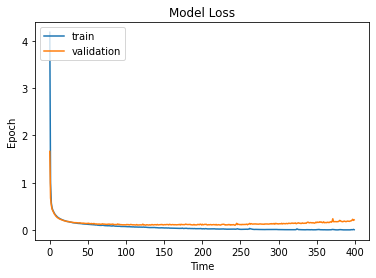

In [ ]:
# Summarize History for Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Time')
plt.ylabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
_, acc = model_cnn.evaluate(X_test_features, y_test)
print("Test Accuracy : ", acc)

11/11 [==============================] - 0s 3ms/step - loss: 0.2156 - acc: 0.9284
Test Accuracy :  0.9283581972122192


11/11 [==============================] - 0s 2ms/step


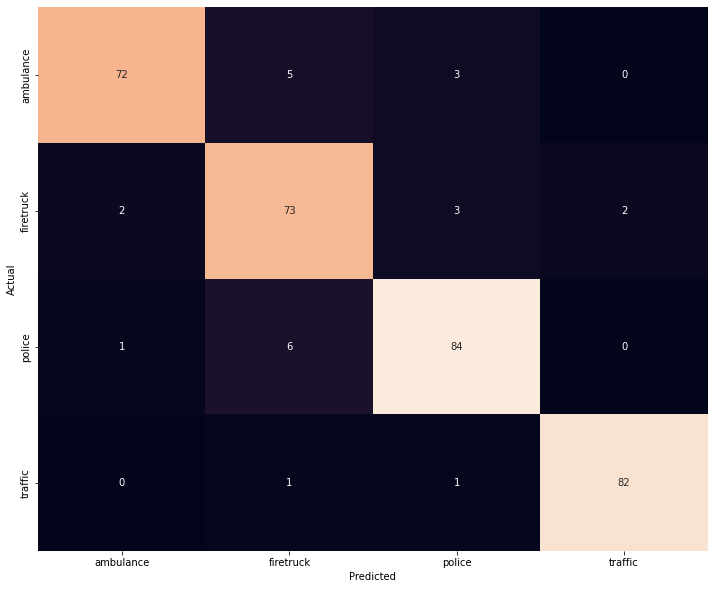

In [ ]:
y_pred = model_cnn.predict(X_test_features)

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model_cnn.save('/content/drive/MyDrive/Audio_classification/sireNNet/CNN_ModelAugmented')

In [ ]:
# CNN Model Built Successfully

# Pending Tasks and Improvements
'''
1. Implement Grid Search For Optimal Parameters
2. Experiment with more CNN Layers
3. Plot Model Chart
'''

'\n1. Implement Grid Search For Optimal Parameters\n2. Experiment with more CNN Layers\n3. Plot Model Chart\n'